# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [2]:
import pandas as pd

In [3]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [4]:
dates=pd.read_csv('../data/state_dates.tsv',delimiter='\t')
import matplotlib.pyplot as plt

In [5]:
mergedata = pd.merge(facts,dates,left_on='USPS_code',right_on='Abbreviation',how='outer')
mergedata['Date']=pd.to_datetime(mergedata['Date'])
mergedata

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Name,Date,Status,Abbreviation
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0,Alabama,1819-12-14,State,AL
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,Alaska,1959-01-03,State,AK
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,American Samoa,1900-04-17,Territory,AS
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0,Arizona,1912-02-14,State,AZ
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0,Arkansas,1836-06-15,State,AR
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,California,1850-09-09,State,CA
6,Colorado,269601,268431,1170,5773714.0,5029196,8,Lark bunting,Rocky Mountain columbine,Nil sine numine,...,Aurora,374114.0,Fort Collins,167830.0,Lakewood,156798.0,Colorado,1876-08-01,State,CO
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,Stamford,129775.0,Hartford,122105.0,Waterbury,108093.0,Connecticut,1788-01-09,State,CT
8,Delaware,6446,5047,1399,989948.0,897934,1,Delaware Blue Hen,Peach blossom,Liberty and independence,...,Newark,33673.0,Middletown,22582.0,Smyrna,11580.0,Delaware,1787-12-07,State,DE
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,NaN,NaN,NaN,NaN,NaN,NaN,District of Columbia,1871-02-21,Federal District,DC


In [6]:
#Question 1
facts.sort_values(by='Pop_2020',ascending=False).head() 

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,Los Angeles,3997984,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,Houston,2325502,San Antonio,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,Jacksonville,907953,Miami,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,New York City,8879928,Buffalo,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0
41,Pennsylvania,119280,115883,3397,13002700.0,12702379,17,Ruffed Grouse,Mountain laurel,"Virtue, Liberty and Independence",...,Philadelphia,1587828,Pittsburgh,301048.0,Allentown,126238.0,Erie,96471.0,Reading,88495.0


In [7]:
#Question 2
facts['WateroverLand']=facts['Area_water']-facts['Area_land']
facts.sort_values(by='WateroverLand',ascending=False).head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,WateroverLand
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,4172
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,1202
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,1109
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,392
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-139


In [8]:
#Question 3
facts['10yearincrease']=facts['Pop_2020']-facts['Pop_2010']
facts.sort_values(by='10yearincrease',ascending=False).head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,WateroverLand,10yearincrease
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,San Antonio,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,-657512,3999944.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,Miami,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0,-107463,2736877.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,-382965,2284267.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,Augusta,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,-144008,1024255.0
52,Washington,184661,172119,12542,7705281.0,6724540,10,Willow goldfinch (American goldfinch),Coast rhododendron,Al-ki,...,Spokane,219190.0,Tacoma,216279.0,Vancouver,183012.0,Bellevue,147599.0,-159577,980741.0


In [9]:
#Question 4
facts.sort_values(by='Area_land',ascending=False).head()
#Answer-Willow Mtarmigan

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,WateroverLand,10yearincrease
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,-1232569,23160.0
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,San Antonio,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,-657512,3999944.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,-382965,2284267.0
28,Montana,380831,376962,3869,1084225.0,989415,2,Western meadowlark,Bitterroot,Oro y plata,...,Missoula,74428.0,Great Falls,58701.0,Bozeman,48532.0,Butte,34284.0,-373093,94810.0
33,New Mexico,314917,314161,757,2117522.0,2059179,3,Greater roadrunner,Yucca flower,Crescit eundo,...,Las Cruces,102926.0,Rio Rancho,98023.0,Santa Fe,84683.0,Roswell,47635.0,-313404,58343.0


For land area, this is the bird with the highest population

In [10]:
#Question 5

calculation = (facts['city_1_pop']  == facts['Capital_pop']).sum()
print(calculation)

#facts = facts.fillna(value =0)

21


In [11]:
#Question 6
print('From the table the answer would be New York')
facts['calculation2'] = (100*(facts['city_1_pop']- facts['city_5_pop'])/facts['city_1_pop'])
facts.sort_values(by='calculation2',ascending =False).head()

From the table the answer would be New York


,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,WateroverLand,10yearincrease,calculation2
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,-102817,823147.0,98.392453
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0,-1232569,23160.0,97.034006
15,Illinois,149995,143793,6202,12812508.0,12830632,17,Northern cardinal,Violet,"State sovereignty, national union",...,198187.0,Naperville,148304.0,Joliet,148099.0,Rockford,146526.0,-137591,-18124.0,94.585132
41,Pennsylvania,119280,115883,3397,13002700.0,12702379,17,Ruffed Grouse,Mountain laurel,"Virtue, Liberty and Independence",...,301048.0,Allentown,126238.0,Erie,96471.0,Reading,88495.0,-112486,300321.0,94.426663
19,Kentucky,104656,102269,2387,4505836.0,4339367,6,Northern cardinal,Goldenrod,"United we stand, divided we fall; Deo gratiam ...",...,323780.0,Bowling Green,68401.0,Owensboro,59809.0,Covington,40366.0,-99882,166469.0,93.495419


Mount Laurel is the most common


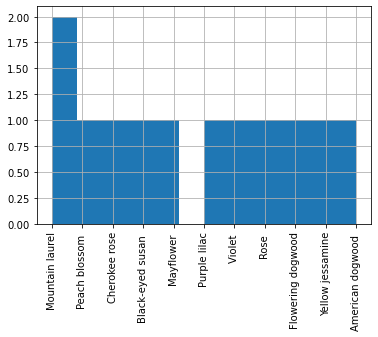

In [12]:
#Question 7
q7 = mergedata['Date']<pd.to_datetime('1790-1-1')
mergedata[q7]['State_flower'].hist(xrot=90, bins=12)
print('Mount Laurel is the most common')

In [13]:
#Question 8
m2 = mergedata['Status']=='Territory'
mergedata['Density']=mergedata['Pop_2020']/mergedata['Area_land']
print(mergedata[m2][['State' , 'Density']].sort_values(by= 'Density', ascending =False).head(1))
m3 = mergedata['Status'] == 'State'
print(mergedata[m3][['State', 'Density']].sort_values(by= 'Density', ascending =True).head(1))
#Answer is Puerto Rico

            State     Density
42   Puerto Rico   370.531574
      State   Density
1   Alaska   0.496221


<AxesSubplot:xlabel='State'>

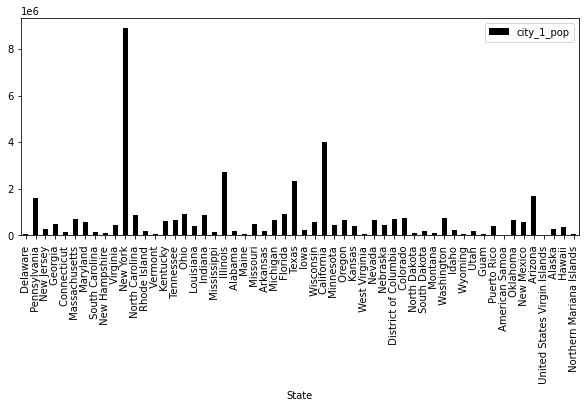

In [14]:
#Question 9
mergedata.sort_values(by='Date',ascending=True).plot(x='State',y='city_1_pop',kind='bar',color='black',figsize=(10,4))

<AxesSubplot:xlabel='State'>

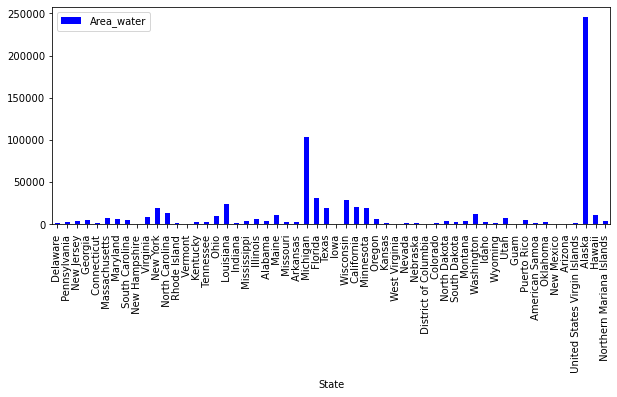

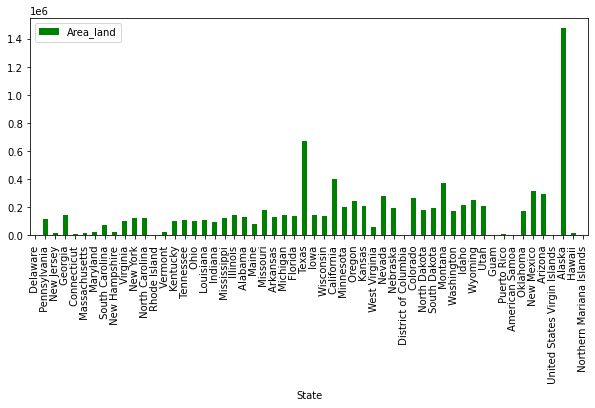

In [18]:
#Question 10
mergedata.sort_values(by='Date',ascending=True).plot(x='State',y='Area_water',kind='bar',color='blue',figsize=(10,4))
mergedata.sort_values(by='Date',ascending=True).plot(x='State',y='Area_land',kind='bar',color='green',figsize=(10,4))

>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

Hint: `pd.read_csv('../data/state_dates.tsv',delimiter="\t")`

Hint: You likely want to convert the Date column to datetime. You might have to correct errors in the data as well.

Hint: `states['Date']<pd.datetime(1790,1,1)`

Hint: `pd.merge(****,****,left_on='USPS_code',right_on='Abbreviation',how='outer')`

In [ ]:
# Sample code to help with the plots

#import matplotlib as plt
#%config InlineBackend.figure_format ='retina' #This makes your plot clearer


#plot = *your df by date*[[*column*,'Abbreviation']].plot(kind='bar',figsize=(10,4))
#plot.set_xticklabels(*your df by date*['Abbreviation']);